In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

In [21]:
data = load_iris()
y = load_iris()['target']
iris_data = pd.DataFrame(data.data, columns=data.feature_names)
iris_data['Species'] = y
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
iris_data['Species']= label_encoder.fit_transform(iris_data['Species'])
iris_data['Species'].unique()

array([0, 1, 2])

In [39]:
X, y = iris_data.drop(["Species"], axis = 1), iris_data.Species

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [42]:
def gbnaivebayes(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
    print("The parameters are - ", gnb.get_params(deep=True))
    print("Accuracy", accuracy_score(y_pred, y_test)*100)

In [43]:
gbnaivebayes(X_train, y_train, X_test, y_test)

Number of mislabeled points out of a total 30 points : 0
The parameters are -  {'priors': None, 'var_smoothing': 1e-09}
Accuracy 100.0


In [45]:
## Standandardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_scaled, y, test_size=0.2, random_state=24)
print(X_train_std.shape, X_test_std.shape, y_train_std.shape, y_test_std.shape)

(120, 4) (30, 4) (120,) (30,)


In [46]:
## Applying GBNaivebayes
gbnaivebayes(X_train_std, y_train_std, X_test_std, y_test_std)

Number of mislabeled points out of a total 30 points : 0
The parameters are -  {'priors': None, 'var_smoothing': 1e-09}
Accuracy 100.0


***

In [30]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

(array([[1., 1., 0., 1., 0., 0., 1., 0., 1., 1.],
        [0., 1., 0., 2., 0., 0., 2., 0., 1., 0.]]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <a list of 2 BarContainer objects>)

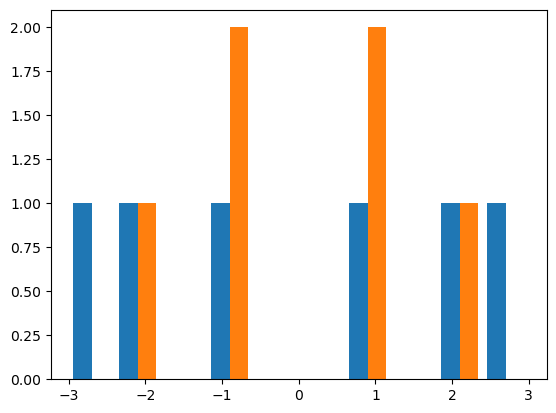

In [32]:
import matplotlib.pyplot as plt
plt.hist(X)